In [2]:
import pandas as pd
from scipy.integrate import simps
import numpy as np
import json


### NASA

In [3]:
# reading NASA DATA

cpu_nasa = np.load("/home/matteo/Documents/postDoc/CTTC/FGCS/git_repo/NASA_turbofan_regression/results/deployability/processed/cpu_usage_data.npz")
gpu_nasa = np.load("/home/matteo/Documents/postDoc/CTTC/FGCS/git_repo/NASA_turbofan_regression/results/deployability/processed/gpu_usage_data.npz")
memory_usage_nasa = np.load("/home/matteo/Documents/postDoc/CTTC/FGCS/git_repo/NASA_turbofan_regression/results/deployability/processed/memory_usage_data.npz")
times_pred_nasa = np.load("/home/matteo/Documents/postDoc/CTTC/FGCS/git_repo/NASA_turbofan_regression/results/deployability/processed/times_pred_data.npz")
times_train_nasa = np.load("/home/matteo/Documents/postDoc/CTTC/FGCS/git_repo/NASA_turbofan_regression/results/deployability/processed/times_train_data.npz")
energy_nasa = np.load("/home/matteo/Documents/postDoc/CTTC/FGCS/git_repo/NASA_turbofan_regression/results/deployability/processed/energy_consumption_data.npz")

### Times

In [4]:
avg_train_time_lstm_gpu = times_train_nasa["avg_train_time_lstm_gpu"]
avg_train_time_lstm_cpu = times_train_nasa["avg_train_time_lstm_cpu"]
avg_train_time_ecae_1layers_mlp = times_train_nasa["avg_train_time_ecae_1layers_mlp"]
avg_train_time_ecae_2layers_mlp = times_train_nasa["avg_train_time_ecae_2layers_mlp"]
avg_train_time_ecae_1layers_ae = times_train_nasa["avg_train_time_ecae_1layers_ae"]
avg_train_time_ecae_2layers_ae = times_train_nasa["avg_train_time_ecae_2layers_ae"]
avg_train_time_race_step1_1layers=times_train_nasa["avg_train_time_race_step1_1layers"]
avg_train_time_race_step1_2layers=times_train_nasa["avg_train_time_race_step1_2layers"]
avg_train_time_race_step2_1layers=times_train_nasa["avg_train_time_race_step2_1layers"]
avg_train_time_race_step2_2layers=times_train_nasa["avg_train_time_race_step2_2layers"]

avg_pred_time_lstm_gpu = times_pred_nasa["avg_pred_time_lstm_gpu"]
avg_pred_time_lstm_cpu = times_pred_nasa["avg_pred_time_lstm_cpu"]
avg_pred_time_ecae_1layers_mlp = times_pred_nasa["avg_pred_time_ecae_1layers"]
avg_pred_time_ecae_2layers_mlp = times_pred_nasa["avg_pred_time_ecae_2layers"]
avg_pred_time_ecae_1layers_ae = times_pred_nasa["avg_pred_time_ecae_1layers_cnn"]
avg_pred_time_ecae_2layers_ae = times_pred_nasa["avg_pred_time_ecae_2layers_cnn"]
avg_pred_time_race_step1_1layers = times_pred_nasa["avg_pred_time_race_step1_1layers"]
avg_pred_time_race_step1_2layers = times_pred_nasa["avg_pred_time_race_step1_2layers"]
avg_pred_time_race_step2_1layers = times_pred_nasa["avg_pred_time_race_step2_1layers"]
avg_pred_time_race_step2_2layers = times_pred_nasa["avg_pred_time_race_step2_2layers"]

In [5]:
avg_pred_time_lstm_gpu

array([0.00123572, 0.00261188, 0.00123692, 0.00254989])

### CPU

In [6]:
avg_cpu_lstm_gpu = cpu_nasa["avg_cpu_usage_lstm_gpu"]
avg_cpu_lstm_cpu = cpu_nasa["avg_cpu_usage_lstm_cpu"]
avg_cpu_ecae_1layers_mlp = cpu_nasa["avg_cpu_usage_ecae_1layers_mlp"]
avg_cpu_ecae_2layers_mlp = cpu_nasa["avg_cpu_usage_ecae_2layers_mlp"]
avg_cpu_ecae_1layers_ae = cpu_nasa["avg_cpu_usage_ecae_1layers_ae"]
avg_cpu_ecae_2layers_ae = cpu_nasa["avg_cpu_usage_ecae_2layers_ae"]
avg_cpu_race_step2_1layers=cpu_nasa["avg_cpu_usage_race_step2_1layers"]
avg_cpu_race_step2_2layers=cpu_nasa["avg_cpu_usage_race_step2_2layers"]

### GPU

In [7]:
avg_gpu_usage_lstm_gpu = gpu_nasa["avg_gpu_usage_lstm_gpu"]
avg_gpu_usage_lstm_cpu = gpu_nasa["avg_gpu_usage_lstm_cpu"]
avg_gpu_usage_ecae_1layers_mlp = gpu_nasa["avg_gpu_usage_ecae_1layers_mlp"]
avg_gpu_usage_ecae_1layers_ae = gpu_nasa["avg_gpu_usage_ecae_1layers_ae"]
avg_gpu_usage_ecae_2layers_mlp = gpu_nasa["avg_gpu_usage_ecae_2layers_mlp"]
avg_gpu_usage_ecae_2layers_ae = gpu_nasa["avg_gpu_usage_ecae_2layers_ae"]
avg_gpu_usage_race_step2_1layers = gpu_nasa["avg_gpu_usage_race_step2_1layers"]
avg_gpu_usage_race_step2_2layers = gpu_nasa["avg_gpu_usage_race_step2_1layers"]

### Memory

In [8]:
avg_memory_usage_lstm_gpu = memory_usage_nasa["avg_memory_usage_lstm_gpu"]
avg_memory_usage_lstm_cpu = memory_usage_nasa["avg_memory_usage_lstm_cpu"]
avg_memory_usage_ecae_1layers_mlp = memory_usage_nasa["avg_memory_usage_ecae_1layers_mlp"]
avg_memory_usage_ecae_1layers_ae = memory_usage_nasa["avg_memory_usage_ecae_1layers_ae"]
avg_memory_usage_ecae_2layers_mlp = memory_usage_nasa["avg_memory_usage_ecae_2layers_mlp"]
avg_memory_usage_ecae_2layers_ae = memory_usage_nasa["avg_memory_usage_ecae_2layers_ae"]
avg_memory_usage_race_step2_1layers = memory_usage_nasa["avg_memory_usage_race_step2_1layers"]
avg_memory_usage_race_step2_2layers = memory_usage_nasa["avg_memory_usage_race_step2_1layers"]

### Energy

In [9]:
avg_energy_lstm_gpu = energy_nasa["avg_energy_lstm_gpu"]
avg_energy_lstm_cpu = energy_nasa["avg_energy_lstm_cpu"]
avg_energy_ecae_1layers_mlp = energy_nasa["avg_energy_ecae_1layers_mlp"]
avg_energy_ecae_1layers_cnn = energy_nasa["avg_energy_ecae_1layers_cnn"]
avg_energy_ecae_2layers_mlp = energy_nasa["avg_energy_ecae_2layers_mlp"]
avg_energy_ecae_2layers_cnn = energy_nasa["avg_energy_ecae_2layers_cnn"]
avg_energy_ecae_2layers_mlp = energy_nasa["avg_energy_ecae_2layers_mlp"]
avg_energy_race_step2_1layers = energy_nasa["avg_energy_race_step2_1layers"]
avg_energy_race_step2_2layers = energy_nasa["avg_energy_race_step2_2layers"]

In [10]:
my_dict_train_nasa, my_dict_pred_nasa = {}, {}
settings = ["S1", "S2", "S3", "S4"]
for index, s in enumerate(settings):
    my_dict_train_nasa[s] = {
        "avg_train_time_lstm_gpu": avg_train_time_lstm_gpu[index],
        "avg_train_time_lstm_cpu": avg_train_time_lstm_cpu[index],
        "avg_train_time_ecae_1layers_mlp": avg_train_time_ecae_1layers_mlp[index],
        "avg_train_time_ecae_2layers_mlp": avg_train_time_ecae_2layers_mlp[index],
        "avg_train_time_ecae_1layers_ae": avg_train_time_ecae_1layers_ae[index],
        "avg_train_time_ecae_2layers_ae": avg_train_time_ecae_2layers_ae[index],
        "avg_train_time_race_step2_1layers": avg_train_time_race_step2_1layers[index],
        "avg_train_time_race_step2_2layers": avg_train_time_race_step2_2layers[index],
    }
    my_dict_pred_nasa[s] = {
        "avg_pred_time_lstm_gpu": avg_pred_time_lstm_gpu[index],
        "avg_pred_time_lstm_cpu": avg_pred_time_lstm_cpu[index],
        "avg_pred_time_ecae_1layers_mlp": avg_pred_time_ecae_1layers_mlp[index],
        "avg_pred_time_ecae_2layers_mlp": avg_pred_time_ecae_2layers_mlp[index],
        "avg_pred_time_ecae_1layers_ae": avg_pred_time_ecae_1layers_ae[index],
        "avg_pred_time_ecae_2layers_ae": avg_pred_time_ecae_2layers_ae[index],
        "avg_pred_time_race_step2_1layers": avg_pred_time_race_step2_1layers[index],
        "avg_pred_time_race_step2_2layers": avg_pred_time_race_step2_2layers[index],
    }

# save the dictionaries to json files
with open("/home/matteo/Documents/postDoc/CTTC/FGCS/git_repo/DCASE_audio/results/fidelity/nasa_train.json", "w") as f:
    json.dump(my_dict_train_nasa, f, indent=4)
with open("/home/matteo/Documents/postDoc/CTTC/FGCS/git_repo/DCASE_audio/results/fidelity/nasa_pred.json", "w") as f:
    json.dump(my_dict_pred_nasa, f, indent=4)


In [11]:
def getResourceUsage(df_energy, startTime, endTime):
    # select portion from df_energy with timestamp between start_train and end_train
    df_energy_filtered = df_energy[(df_energy["timestamp"] >= startTime) & (df_energy["timestamp"] <= endTime)]
    print(len(df_energy_filtered), "rows in df_energy_filtered")
    print("monitoring stated ealier than startTime:", df_energy["timestamp"].min() < startTime)
    print("monitoring ended later than endTime:", df_energy["timestamp"].max() > endTime)
    print("duration", endTime - startTime)

    # calculate the mean and std of each column
    cpu_usage_percentage_mean = df_energy_filtered["energon_cpu_total_usage_percentage"].mean()
    cpu_usage_percentage_std = df_energy_filtered["energon_cpu_total_usage_percentage"].std()
    gpu_usage_percentage_mean = df_energy_filtered["energon_gpu_total_usage_percentage"].mean()
    gpu_usage_percentage_std = df_energy_filtered["energon_gpu_total_usage_percentage"].std()
    memory_usage_mean = df_energy_filtered["energon_ram_used_percentage"].mean()
    memory_usage_std = df_energy_filtered["energon_ram_used_percentage"].std()
    total_power = df_energy_filtered["energon_total_in_power_mW"].mean()
    max_cpu_power = df_energy_filtered["energon_cpu_in_power_mW"].max()
    max_gpu_power = df_energy_filtered["energon_gpu_in_power_mW"].max()

    # calculate the energy consumption using simpson's rule
    total_energy_consumption = simps(df_energy_filtered["energon_total_in_power_mW"], df_energy_filtered["timestamp"]) / 1000  # in Joules
    cpu_energy_consumption = simps(df_energy_filtered["energon_cpu_in_power_mW"], df_energy_filtered["timestamp"]) / 1000
    gpu_energy_consumption = simps(df_energy_filtered["energon_gpu_in_power_mW"], df_energy_filtered["timestamp"]) / 1000

    return {
        "tot_time": endTime - startTime,
        "cpu_usage_percentage_mean": cpu_usage_percentage_mean,
        "cpu_usage_percentage_std": cpu_usage_percentage_std,
        "gpu_usage_percentage_mean": gpu_usage_percentage_mean,
        "gpu_usage_percentage_std": gpu_usage_percentage_std,
        "memory_usage_mean": memory_usage_mean,
        "memory_usage_std": memory_usage_std,
        "max_cpu_power": max_cpu_power,
        "max_gpu_power": max_gpu_power,
        "total_energy_consumption": total_energy_consumption,
        "cpu_energy_consumption": cpu_energy_consumption,
        "gpu_energy_consumption": gpu_energy_consumption
    }



In [12]:
df_energy_ecae = pd.read_csv("./ECAE.csv", index_col=False)
df_energy_race = pd.read_csv("./RACE_step2.csv", index_col=False)
df_energy_ae_mfcc = pd.read_csv("./AE_MFCC13.csv", index_col=False)
df_energy_ae_mel = pd.read_csv("./AE_MELSPECTRO.csv", index_col=False)

# count the number of rows with -1 values
print("Number of rows with -1 values in df_energy_ecae:", len(df_energy_ecae[df_energy_ecae.eq(-1).any(axis=1)]))
print("Number of rows with -1 values in df_energy race:", len(df_energy_race[df_energy_race.eq(-1).any(axis=1)]))
print("Number of rows with -1 values in df_energy_ae_mfcc:", len(df_energy_ae_mfcc[df_energy_ae_mfcc.eq(-1).any(axis=1)]))
print("Number of rows with -1 values in df_energy_ae_mel:", len(df_energy_ae_mel[df_energy_ae_mel.eq(-1).any(axis=1)]))

# remove lines containing -1 values in any column
df_energy_ecae = df_energy_ecae[df_energy_ecae.ge(0).all(axis=1)]
df_energy_race = df_energy_race[df_energy_race.ge(0).all(axis=1)]
df_energy_ae_mfcc = df_energy_ae_mfcc[df_energy_ae_mfcc.ge(0).all(axis=1)]
df_energy_ae_mel = df_energy_ae_mel[df_energy_ae_mel.ge(0).all(axis=1)]


Number of rows with -1 values in df_energy_ecae: 4
Number of rows with -1 values in df_energy race: 28
Number of rows with -1 values in df_energy_ae_mfcc: 6
Number of rows with -1 values in df_energy_ae_mel: 8


In [13]:
df_energy_ecae.columns

Index(['energon_total_in_power_mW', 'energon_cpu_in_power_mW',
       'energon_gpu_in_power_mW', 'energon_cpu_total_usage_percentage',
       'energon_gpu_total_usage_percentage', 'energon_ram_used_percentage',
       'timestamp'],
      dtype='object')

In [14]:
DEV_ASSETS = ['fan', 'gearbox', 'slider', 'ToyCar',  'bearing', 'valve', 'ToyTrain']
EVAL_ASSETS = ["bandsaw", "grinder", "shaker", "ToyDrone", "ToyNscale", "ToyTank", "Vacuum"]

ALL_ASSETS = DEV_ASSETS + EVAL_ASSETS 

## Prediction time

In [15]:
dfs_ae_melspec = []
dfs_ae_mfcc = []
dfs_ecae_layer1 = []
dfs_ecae_layer2 = []
dfs_race_layer1 = []
dfs_race_layer2 = []


In [16]:
for a in ALL_ASSETS:
    # ae melspec
    df_ae_melspec = pd.read_csv(f"../accuracy/ae_baseline_melspec/{a}_results.csv", index_col=False)
    df_ae_mfcc = pd.read_csv(f"../accuracy/ae_baseline_mfcc13/{a}_results.csv", index_col=False)
    df_ecae_layer1 = pd.read_csv(f"../deployability/ecae_loading_hps/1_rc_layers/cae_pytorch_rc_mlp_anomaly_{a}/{a}_results_train_cae_mlp_load_rc_hps.csv", index_col=False)
    df_ecae_layer2 = pd.read_csv(f"../deployability/ecae_loading_hps/2_rc_layers/cae_pytorch_rc_mlp_anomaly_{a}/{a}_results_train_cae_mlp_load_rc_hps.csv", index_col=False)
    df_race_layer1 = pd.read_csv(f"../accuracy/direct_test_step2/1/{a}_results.csv", index_col=False)
    df_race_layer2 = pd.read_csv(f"../accuracy/direct_test_step2/2/{a}_results.csv", index_col=False)

    dfs_ae_melspec.append(df_ae_melspec)
    dfs_ae_mfcc.append(df_ae_mfcc)
    dfs_ecae_layer1.append(df_ecae_layer1)
    dfs_ecae_layer2.append(df_ecae_layer2)
    dfs_race_layer1.append(df_race_layer1)
    dfs_race_layer2.append(df_race_layer2)

In [17]:
dcase_melspec_train_time = []
dcase_melspec_pred_time = []
dcase_melspec_cpu_usage = []
dcase_melspec_gpu_usage = []
dcase_melspec_memory_usage = []
dcase_melspec_energy = []

dcase_mfcc_train_time = []
dcase_mfcc_pred_time = []
dcase_mfcc_cpu_usage = []
dcase_mfcc_gpu_usage = []
dcase_mfcc_memory_usage = []
dcase_mfcc_energy = []

dcase_ecae_layer1_train_time_cnn = []
dcase_ecae_layer1_pred_time_cnn = []
dcase_ecae_layer1_train_time_mlp = []
dcase_ecae_layer1_pred_time_mlp = []
dcase_ecae_layer1_cpu_usage_cnn = []
dcase_ecae_layer1_cpu_usage_mlp = []
dcase_ecae_layer1_gpu_usage_cnn = []
dcase_ecae_layer1_gpu_usage_mlp = []
dcase_ecae_layer1_memory_usage_cnn = []
dcase_ecae_layer1_memory_usage_mlp = []
dcase_ecae_layer1_energy_cnn = []
dcase_ecae_layer1_energy_mlp = []

dcase_ecae_layer2_train_time_cnn = []
dcase_ecae_layer2_pred_time_cnn = []
dcase_ecae_layer2_train_time_mlp = []
dcase_ecae_layer2_pred_time_mlp = []
dcase_ecae_layer2_cpu_usage_cnn = []
dcase_ecae_layer2_cpu_usage_mlp = []
dcase_ecae_layer2_gpu_usage_cnn = []
dcase_ecae_layer2_gpu_usage_mlp = []
dcase_ecae_layer2_memory_usage_cnn = []
dcase_ecae_layer2_memory_usage_mlp = []
dcase_ecae_layer2_energy_cnn = []
dcase_ecae_layer2_energy_mlp = []

dcase_race_layer1_train_time = []
dcase_race_layer1_pred_time = []
dcase_race_layer1_cpu_usage = []
dcase_race_layer1_gpu_usage = []
dcase_race_layer1_memory_usage = []
dcase_race_layer1_energy = []

dcase_race_layer2_train_time = []
dcase_race_layer2_pred_time = []
dcase_race_layer2_cpu_usage = []
dcase_race_layer2_gpu_usage = []
dcase_race_layer2_memory_usage = []
dcase_race_layer2_energy = []

In [18]:
dfs_race_layer1[0].columns

Index(['mlp_training_time', 'start_training_time', 'end_training_time',
       'mlp_prediction_time', 'start_prediction_time', 'end_prediction_time',
       'anomaly_threshold', 'avg_train_error', 'true_positive',
       'true_negative', 'false_positive', 'false_negative', 'auc_score',
       'pauc_score', 'accuracy', 'macro_avg_f1', 'weighted_avg_f1',
       'total_processing_time', 'model_name', 'hps_origin',
       'macs_model_readout', 'n_model_parameters_readout', 'model_size_bytes'],
      dtype='object')

In [19]:
dfs_ae_melspec[0]["end_prediction_time"]

0    1.748171e+09
Name: end_prediction_time, dtype: float64

In [20]:
my_dict_train, my_dict_test = {}, {}
my_dict_size = {}

In [21]:
for a in ALL_ASSETS:
    print(f"Processing {a}...")
    mels_train = getResourceUsage(df_energy_ae_mel, dfs_ae_melspec[ALL_ASSETS.index(a)]["start_train_time"].iloc[0], dfs_ae_melspec[ALL_ASSETS.index(a)]["end_train_time"].iloc[0])
    mfcc_train = getResourceUsage(df_energy_ae_mfcc, dfs_ae_mfcc[ALL_ASSETS.index(a)]["start_train_time"].iloc[0], dfs_ae_mfcc[ALL_ASSETS.index(a)]["end_train_time"].iloc[0])    
    ecae_layer1_cnn = getResourceUsage(df_energy_ecae, dfs_ecae_layer1[ALL_ASSETS.index(a)]["start_cae_training_time"].iloc[0], dfs_ecae_layer1[ALL_ASSETS.index(a)]["end_cae_training_time"].iloc[0])
    ecae_layer1_mlp = getResourceUsage(df_energy_ecae, dfs_ecae_layer1[ALL_ASSETS.index(a)]["start_final_mlp_training_time"].iloc[0], dfs_ecae_layer1[ALL_ASSETS.index(a)]["end_final_mlp_training_time"].iloc[0])
    ecae_layer2_cnn = getResourceUsage(df_energy_ecae, dfs_ecae_layer2[ALL_ASSETS.index(a)]["start_cae_training_time"].iloc[0], dfs_ecae_layer2[ALL_ASSETS.index(a)]["end_cae_training_time"].iloc[0])
    ecae_layer2_mlp = getResourceUsage(df_energy_ecae, dfs_ecae_layer2[ALL_ASSETS.index(a)]["start_final_mlp_training_time"].iloc[0], dfs_ecae_layer2[ALL_ASSETS.index(a)]["end_final_mlp_training_time"].iloc[0])
    
    race_layer1_train = getResourceUsage(df_energy_race, dfs_race_layer1[ALL_ASSETS.index(a)]["start_training_time"].iloc[0], dfs_race_layer1[ALL_ASSETS.index(a)]["end_training_time"].iloc[0])
    race_layer2_train = getResourceUsage(df_energy_race, dfs_race_layer2[ALL_ASSETS.index(a)]["start_training_time"].iloc[0], dfs_race_layer2[ALL_ASSETS.index(a)]["end_training_time"].iloc[0])
    
    dcase_melspec_train_time.append(dfs_ae_melspec[ALL_ASSETS.index(a)]["train_time_s"].iloc[0])
    dcase_melspec_pred_time.append(dfs_ae_melspec[ALL_ASSETS.index(a)]["pred_time_s"].iloc[0])
    dcase_mfcc_train_time.append(dfs_ae_mfcc[ALL_ASSETS.index(a)]["train_time_seconds"].iloc[0])
    dcase_mfcc_pred_time.append(dfs_ae_mfcc[ALL_ASSETS.index(a)]["predict_time_seconds"].iloc[0])

    dcase_ecae_layer1_train_time_cnn.append(dfs_ecae_layer1[ALL_ASSETS.index(a)]["cae_training_time_seconds"].iloc[0])
    dcase_ecae_layer1_train_time_mlp.append(dfs_ecae_layer1[ALL_ASSETS.index(a)]["final_mlp_training_time_seconds"].iloc[0])
    dcase_ecae_layer1_pred_time_cnn.append(dfs_ecae_layer1[ALL_ASSETS.index(a)]["cae_encoding_time_seconds"].iloc[0])
    dcase_ecae_layer1_pred_time_mlp.append(dfs_ecae_layer1[ALL_ASSETS.index(a)]["final_mlp_reconstruction_time_seconds"].iloc[0])

    dcase_ecae_layer2_train_time_cnn.append(dfs_ecae_layer2[ALL_ASSETS.index(a)]["cae_training_time_seconds"].iloc[0])
    dcase_ecae_layer2_train_time_mlp.append(dfs_ecae_layer2[ALL_ASSETS.index(a)]["final_mlp_training_time_seconds"].iloc[0])
    dcase_ecae_layer2_pred_time_cnn.append(dfs_ecae_layer2[ALL_ASSETS.index(a)]["cae_encoding_time_seconds"].iloc[0])
    dcase_ecae_layer2_pred_time_mlp.append(dfs_ecae_layer2[ALL_ASSETS.index(a)]["final_mlp_reconstruction_time_seconds"].iloc[0])

    dcase_race_layer1_train_time.append(dfs_race_layer1[ALL_ASSETS.index(a)]["mlp_training_time"].iloc[0])
    dcase_race_layer1_pred_time.append(dfs_race_layer1[ALL_ASSETS.index(a)]["mlp_prediction_time"].iloc[0])
    dcase_race_layer2_train_time.append(dfs_race_layer2[ALL_ASSETS.index(a)]["mlp_training_time"].iloc[0])
    dcase_race_layer2_pred_time.append(dfs_race_layer2[ALL_ASSETS.index(a)]["mlp_prediction_time"].iloc[0])

    if a not in my_dict_train:
        my_dict_train[a] = {}
        my_dict_test[a] = {}
        my_dict_size[a] = {}
    my_dict_train[a]["AENet Mel"] = dfs_ae_melspec[ALL_ASSETS.index(a)]["train_time_s"].iloc[0]
    my_dict_train[a]["AENet MFCC"] = dfs_ae_mfcc[ALL_ASSETS.index(a)]["train_time_seconds"].iloc[0]
    my_dict_train[a]["E-CAE RC 1 RC"] = dfs_ecae_layer1[ALL_ASSETS.index(a)]["cae_training_time_seconds"].iloc[0] + dfs_ecae_layer1[ALL_ASSETS.index(a)]["final_mlp_training_time_seconds"].iloc[0]
    my_dict_train[a]["E-CAE RC 2 RC"] = dfs_ecae_layer2[ALL_ASSETS.index(a)]["cae_training_time_seconds"].iloc[0] + dfs_ecae_layer2[ALL_ASSETS.index(a)]["final_mlp_training_time_seconds"].iloc[0]
    my_dict_train[a]["RACE-DT Hps Round 2 1 RC"] = dfs_race_layer1[ALL_ASSETS.index(a)]["mlp_training_time"].iloc[0]
    my_dict_train[a]["RACE-DT Hps Round 2 2 RC"] = dfs_race_layer2[ALL_ASSETS.index(a)]["mlp_training_time"].iloc[0]

    my_dict_test[a]["AENet Mel"] = dfs_ae_melspec[ALL_ASSETS.index(a)]["pred_time_s"].iloc[0]
    my_dict_test[a]["AENet MFCC"] = dfs_ae_mfcc[ALL_ASSETS.index(a)]["predict_time_seconds"].iloc[0]
    my_dict_test[a]["E-CAE RC 1 RC"] = dfs_ecae_layer1[ALL_ASSETS.index(a)]["cae_encoding_time_seconds"].iloc[0] + dfs_ecae_layer1[ALL_ASSETS.index(a)]["final_mlp_reconstruction_time_seconds"].iloc[0]
    my_dict_test[a]["E-CAE RC 2 RC"] = dfs_ecae_layer2[ALL_ASSETS.index(a)]["cae_encoding_time_seconds"].iloc[0] + dfs_ecae_layer2[ALL_ASSETS.index(a)]["final_mlp_reconstruction_time_seconds"].iloc[0]
    my_dict_test[a]["RACE-DT Hps Round 2 1 RC"] = dfs_race_layer1[ALL_ASSETS.index(a)]["mlp_prediction_time"].iloc[0]
    my_dict_test[a]["RACE-DT Hps Round 2 2 RC"] = dfs_race_layer2[ALL_ASSETS.index(a)]["mlp_prediction_time"].iloc[0]

    my_dict_size[a]["AENet Mel"] = int(dfs_ae_melspec[ALL_ASSETS.index(a)]["model_size_bytes"].iloc[0])
    my_dict_size[a]["AENet MFCC"] = int(dfs_ae_mfcc[ALL_ASSETS.index(a)]["model_size_bytes"].iloc[0])
    my_dict_size[a]["E-CAE RC 1 RC"] = int(dfs_ecae_layer1[ALL_ASSETS.index(a)]["mlp_model_size_bytes"].iloc[0] + dfs_ecae_layer1[ALL_ASSETS.index(a)]["cae_model_size_bytes"].iloc[0])
    my_dict_size[a]["E-CAE RC 2 RC"] = int(dfs_ecae_layer2[ALL_ASSETS.index(a)]["mlp_model_size_bytes"].iloc[0] + dfs_ecae_layer2[ALL_ASSETS.index(a)]["cae_model_size_bytes"].iloc[0])
    my_dict_size[a]["RACE-DT Hps Round 2 1 RC"] = int(dfs_race_layer1[ALL_ASSETS.index(a)]["model_size_bytes"].iloc[0])
    my_dict_size[a]["RACE-DT Hps Round 2 2 RC"] = int(dfs_race_layer2[ALL_ASSETS.index(a)]["model_size_bytes"].iloc[0])

    # --------------------- RESOURCE USAGE ---------------------

    dcase_melspec_cpu_usage.append(mels_train["cpu_usage_percentage_mean"])
    dcase_melspec_gpu_usage.append(mels_train["gpu_usage_percentage_mean"])
    dcase_melspec_memory_usage.append(mels_train["memory_usage_mean"])
    dcase_melspec_energy.append(mels_train["total_energy_consumption"])

    dcase_mfcc_cpu_usage.append(mfcc_train["cpu_usage_percentage_mean"])
    dcase_mfcc_gpu_usage.append(mfcc_train["gpu_usage_percentage_mean"])
    dcase_mfcc_memory_usage.append(mfcc_train["memory_usage_mean"])
    dcase_mfcc_energy.append(mfcc_train["total_energy_consumption"])

    dcase_ecae_layer1_cpu_usage_cnn.append(ecae_layer1_cnn["cpu_usage_percentage_mean"])
    dcase_ecae_layer1_gpu_usage_cnn.append(ecae_layer1_cnn["gpu_usage_percentage_mean"])
    dcase_ecae_layer1_memory_usage_cnn.append(ecae_layer1_cnn["memory_usage_mean"])
    dcase_ecae_layer1_energy_cnn.append(ecae_layer1_cnn["total_energy_consumption"])
    dcase_ecae_layer1_cpu_usage_mlp.append(ecae_layer1_mlp["cpu_usage_percentage_mean"])
    dcase_ecae_layer1_gpu_usage_mlp.append(ecae_layer1_mlp["gpu_usage_percentage_mean"])
    dcase_ecae_layer1_memory_usage_mlp.append(ecae_layer1_mlp["memory_usage_mean"])
    dcase_ecae_layer1_energy_mlp.append(ecae_layer1_mlp["total_energy_consumption"])

    dcase_ecae_layer2_cpu_usage_cnn.append(ecae_layer2_cnn["cpu_usage_percentage_mean"])
    dcase_ecae_layer2_gpu_usage_cnn.append(ecae_layer2_cnn["gpu_usage_percentage_mean"])
    dcase_ecae_layer2_memory_usage_cnn.append(ecae_layer2_cnn["memory_usage_mean"])
    dcase_ecae_layer2_energy_cnn.append(ecae_layer2_cnn["total_energy_consumption"])
    dcase_ecae_layer2_cpu_usage_mlp.append(ecae_layer2_mlp["cpu_usage_percentage_mean"])
    dcase_ecae_layer2_gpu_usage_mlp.append(ecae_layer2_mlp["gpu_usage_percentage_mean"])
    dcase_ecae_layer2_memory_usage_mlp.append(ecae_layer2_mlp["memory_usage_mean"])
    dcase_ecae_layer2_energy_mlp.append(ecae_layer2_mlp["total_energy_consumption"])

    dcase_race_layer1_cpu_usage.append(race_layer1_train["cpu_usage_percentage_mean"])
    dcase_race_layer1_gpu_usage.append(race_layer1_train["gpu_usage_percentage_mean"])
    dcase_race_layer1_memory_usage.append(race_layer1_train["memory_usage_mean"])
    dcase_race_layer1_energy.append(race_layer1_train["total_energy_consumption"])

    dcase_race_layer2_cpu_usage.append(race_layer2_train["cpu_usage_percentage_mean"])
    dcase_race_layer2_gpu_usage.append(race_layer2_train["gpu_usage_percentage_mean"])
    dcase_race_layer2_memory_usage.append(race_layer2_train["memory_usage_mean"])
    dcase_race_layer2_energy.append(race_layer2_train["total_energy_consumption"])
    

Processing fan...


1022 rows in df_energy_filtered
monitoring stated ealier than startTime: True
monitoring ended later than endTime: True
duration 512.5418264865875
992 rows in df_energy_filtered
monitoring stated ealier than startTime: True
monitoring ended later than endTime: True
duration 498.7475550174713
4 rows in df_energy_filtered
monitoring stated ealier than startTime: True
monitoring ended later than endTime: True
duration 2.145561695098877
38 rows in df_energy_filtered
monitoring stated ealier than startTime: True
monitoring ended later than endTime: True
duration 19.42101740837097
4 rows in df_energy_filtered
monitoring stated ealier than startTime: True
monitoring ended later than endTime: True
duration 2.2070963382720947
80 rows in df_energy_filtered
monitoring stated ealier than startTime: True
monitoring ended later than endTime: True
duration 39.45014834403992
44 rows in df_energy_filtered
monitoring stated ealier than startTime: True
monitoring ended later than endTime: True
duration 2

In [22]:
with open("../fidelity/dcase_train.json", "w") as f:
    json.dump(my_dict_train, f, indent=4)
with open("../fidelity/dcase_pred.json", "w") as f:
    json.dump(my_dict_test, f, indent=4)
with open("../fidelity/dcase_model_sizes.json", "w") as f:
    json.dump(my_dict_size, f, indent=4)

In [23]:
dcase_melspec_train_time = pd.Series(dcase_melspec_train_time).to_numpy()
dcase_melspec_pred_time = pd.Series(dcase_melspec_pred_time).to_numpy()
dcase_melspec_cpu_usage = pd.Series(dcase_melspec_cpu_usage).to_numpy()
dcase_melspec_gpu_usage = pd.Series(dcase_melspec_gpu_usage).to_numpy()
dcase_melspec_memory_usage = pd.Series(dcase_melspec_memory_usage).to_numpy()
dcase_melspec_energy = pd.Series(dcase_melspec_energy).to_numpy()

dcase_mfcc_train_time = pd.Series(dcase_mfcc_train_time).to_numpy()
dcase_mfcc_pred_time = pd.Series(dcase_mfcc_pred_time).to_numpy()
dcase_mfcc_cpu_usage = pd.Series(dcase_mfcc_cpu_usage).to_numpy()
dcase_mfcc_gpu_usage = pd.Series(dcase_mfcc_gpu_usage).to_numpy()
dcase_mfcc_memory_usage = pd.Series(dcase_mfcc_memory_usage).to_numpy()
dcase_mfcc_energy = pd.Series(dcase_mfcc_energy).to_numpy()

dcase_ecae_layer1_train_time_cnn = pd.Series(dcase_ecae_layer1_train_time_cnn).to_numpy()
dcase_ecae_layer1_pred_time_cnn = pd.Series(dcase_ecae_layer1_pred_time_cnn).to_numpy()
dcase_ecae_layer1_train_time_mlp = pd.Series(dcase_ecae_layer1_train_time_mlp).to_numpy()
dcase_ecae_layer1_pred_time_mlp = pd.Series(dcase_ecae_layer1_pred_time_mlp).to_numpy()
dcase_ecae_layer1_cpu_usage_cnn = pd.Series(dcase_ecae_layer1_cpu_usage_cnn).to_numpy()
dcase_ecae_layer1_cpu_usage_mlp = pd.Series(dcase_ecae_layer1_cpu_usage_mlp).to_numpy()
dcase_ecae_layer1_gpu_usage_cnn = pd.Series(dcase_ecae_layer1_gpu_usage_cnn).to_numpy()
dcase_ecae_layer1_gpu_usage_mlp = pd.Series(dcase_ecae_layer1_gpu_usage_mlp).to_numpy()
dcase_ecae_layer1_memory_usage_cnn = pd.Series(dcase_ecae_layer1_memory_usage_cnn).to_numpy()
dcase_ecae_layer1_memory_usage_mlp = pd.Series(dcase_ecae_layer1_memory_usage_mlp).to_numpy()
dcase_ecae_layer1_energy_cnn = pd.Series(dcase_ecae_layer1_energy_cnn).to_numpy()
dcase_ecae_layer1_energy_mlp = pd.Series(dcase_ecae_layer1_energy_mlp).to_numpy()

dcase_ecae_layer2_train_time_cnn = pd.Series(dcase_ecae_layer2_train_time_cnn).to_numpy()
dcase_ecae_layer2_pred_time_cnn = pd.Series(dcase_ecae_layer2_pred_time_cnn).to_numpy()
dcase_ecae_layer2_train_time_mlp = pd.Series(dcase_ecae_layer2_train_time_mlp).to_numpy()
dcase_ecae_layer2_pred_time_mlp = pd.Series(dcase_ecae_layer2_pred_time_mlp).to_numpy()
dcase_ecae_layer2_cpu_usage_cnn = pd.Series(dcase_ecae_layer2_cpu_usage_cnn).to_numpy()
dcase_ecae_layer2_cpu_usage_mlp = pd.Series(dcase_ecae_layer2_cpu_usage_mlp).to_numpy()
dcase_ecae_layer2_gpu_usage_cnn = pd.Series(dcase_ecae_layer2_gpu_usage_cnn).to_numpy()
dcase_ecae_layer2_gpu_usage_mlp = pd.Series(dcase_ecae_layer2_gpu_usage_mlp).to_numpy()
dcase_ecae_layer2_memory_usage_cnn = pd.Series(dcase_ecae_layer2_memory_usage_cnn).to_numpy()
dcase_ecae_layer2_memory_usage_mlp = pd.Series(dcase_ecae_layer2_memory_usage_mlp).to_numpy()
dcase_ecae_layer2_energy_cnn = pd.Series(dcase_ecae_layer2_energy_cnn).to_numpy()
dcase_ecae_layer2_energy_mlp = pd.Series(dcase_ecae_layer2_energy_mlp).to_numpy()

dcase_race_layer1_train_time = pd.Series(dcase_race_layer1_train_time).to_numpy()
dcase_race_layer1_pred_time = pd.Series(dcase_race_layer1_pred_time).to_numpy()
dcase_race_layer1_cpu_usage = pd.Series(dcase_race_layer1_cpu_usage).to_numpy()
dcase_race_layer1_gpu_usage = pd.Series(dcase_race_layer1_gpu_usage).to_numpy()
dcase_race_layer1_memory_usage = pd.Series(dcase_race_layer1_memory_usage).to_numpy()
dcase_race_layer1_energy = pd.Series(dcase_race_layer1_energy).to_numpy()

dcase_race_layer2_train_time = pd.Series(dcase_race_layer2_train_time).to_numpy()
dcase_race_layer2_pred_time = pd.Series(dcase_race_layer2_pred_time).to_numpy()
dcase_race_layer2_cpu_usage = pd.Series(dcase_race_layer2_cpu_usage).to_numpy()
dcase_race_layer2_gpu_usage = pd.Series(dcase_race_layer2_gpu_usage).to_numpy()
dcase_race_layer2_memory_usage = pd.Series(dcase_race_layer2_memory_usage).to_numpy()
dcase_race_layer2_energy = pd.Series(dcase_race_layer2_energy).to_numpy()

In [24]:
train_time_average_nasa_lstm_gpu, train_time_average_nasa_lstm_gpu_std = avg_train_time_lstm_gpu.mean(), avg_train_time_lstm_gpu.std()
train_time_average_nasa_lstm_cpu, train_time_average_nasa_lstm_cpu_std = avg_train_time_lstm_cpu.mean(), avg_train_time_lstm_cpu.std()
train_time_average_nasa_ecae_1layers_mlp, train_time_average_nasa_ecae_1layers_mlp_std = avg_train_time_ecae_1layers_mlp.mean(), avg_train_time_ecae_1layers_mlp.std()
train_time_average_nasa_ecae_2layers_mlp, train_time_average_nasa_ecae_2layers_mlp_std = avg_train_time_ecae_2layers_mlp.mean(), avg_train_time_ecae_2layers_mlp.std()
train_time_average_nasa_ecae_1layers_ae, train_time_average_nasa_ecae_1layers_ae_std = avg_train_time_ecae_1layers_ae.mean(), avg_train_time_ecae_1layers_ae.std()
train_time_average_nasa_ecae_2layers_ae, train_time_average_nasa_ecae_2layers_ae_std = avg_train_time_ecae_2layers_ae.mean(), avg_train_time_ecae_2layers_ae.std()
train_time_average_nasa_race_step2_1layers, train_time_average_nasa_race_step2_1layers_std = avg_train_time_race_step2_1layers.mean(), avg_train_time_race_step2_1layers.std()
train_time_average_nasa_race_step2_2layers, train_time_average_nasa_race_step2_2layers_std = avg_train_time_race_step2_2layers.mean(), avg_train_time_race_step2_1layers.std()

train_time_average_dcase_melspec, train_time_average_dcase_melspec_std = dcase_melspec_train_time.mean(), dcase_melspec_train_time.std()
train_time_average_dcase_mfcc, train_time_average_dcase_mfcc_std = dcase_mfcc_train_time.mean(), dcase_mfcc_train_time.std()
train_time_average_dcase_ecae_layer1_cnn, train_time_average_dcase_ecae_layer1_cnn_std = dcase_ecae_layer1_train_time_cnn.mean(), dcase_ecae_layer1_train_time_cnn.std()
train_time_average_dcase_ecae_layer1_mlp, train_time_average_dcase_ecae_layer1_mlp_std = dcase_ecae_layer1_train_time_mlp.mean(), dcase_ecae_layer1_train_time_mlp.std()
train_time_average_dcase_ecae_layer2_cnn, train_time_average_dcase_ecae_layer2_cnn_std = dcase_ecae_layer2_train_time_cnn.mean(), dcase_ecae_layer2_train_time_cnn.std()
train_time_average_dcase_ecae_layer2_mlp, train_time_average_dcase_ecae_layer2_mlp_std = dcase_ecae_layer2_train_time_mlp.mean(), dcase_ecae_layer2_train_time_mlp.std()
train_time_average_dcase_race_layer1, train_time_average_dcase_race_layer1_std = dcase_race_layer1_train_time.mean(), dcase_race_layer1_train_time.std()
train_time_average_dcase_race_layer2, train_time_average_dcase_race_layer2_std = dcase_race_layer2_train_time.mean(), dcase_race_layer2_train_time.std()

red_ai_gpu_train_time_mean = [train_time_average_dcase_mfcc, train_time_average_nasa_lstm_gpu]
red_ai_gpu_train_time_std = [train_time_average_dcase_mfcc_std, train_time_average_nasa_lstm_gpu_std]

ecae_1layer_cnn_train_time_mean = [train_time_average_dcase_ecae_layer1_cnn, train_time_average_nasa_ecae_1layers_ae]
ecae_1layer_cnn_train_time_std = [train_time_average_dcase_ecae_layer1_cnn_std, train_time_average_nasa_ecae_1layers_ae_std]
ecae_1layer_mlp_train_time_mean = [train_time_average_dcase_ecae_layer1_mlp, train_time_average_nasa_ecae_2layers_mlp]
ecae_1layer_mlp_train_time_std = [train_time_average_dcase_ecae_layer1_mlp_std, train_time_average_nasa_ecae_1layers_mlp_std]

ecae_2layer_cnn_train_time_mean = [train_time_average_dcase_ecae_layer2_cnn, train_time_average_nasa_ecae_2layers_ae]
ecae_2layer_cnn_train_time_std = [train_time_average_dcase_ecae_layer2_cnn_std, train_time_average_nasa_ecae_2layers_ae_std]
ecae_2layer_mlp_train_time_mean = [train_time_average_dcase_ecae_layer2_mlp, train_time_average_nasa_ecae_1layers_mlp]
ecae_2layer_mlp_train_time_std = [train_time_average_dcase_ecae_layer2_mlp_std, train_time_average_nasa_ecae_2layers_mlp_std]

race_1layer_train_time_mean = [train_time_average_dcase_race_layer1, train_time_average_nasa_race_step2_1layers]
race_1layer_train_time_std = [train_time_average_dcase_race_layer1_std, train_time_average_nasa_race_step2_1layers_std]
race_2layer_train_time_mean = [train_time_average_dcase_race_layer2, train_time_average_nasa_race_step2_2layers]
race_2layer_train_time_std = [train_time_average_dcase_race_layer2_std, train_time_average_nasa_race_step2_2layers_std]

print(race_1layer_train_time_std)

# ------------------------------------- pred

pred_time_average_nasa_lstm_gpu, pred_time_average_nasa_lstm_gpu_std = avg_pred_time_lstm_gpu.mean(), avg_pred_time_lstm_gpu.std()
pred_time_average_nasa_lstm_cpu, pred_time_average_nasa_lstm_cpu_std = avg_pred_time_lstm_cpu.mean(), avg_pred_time_lstm_cpu.std()
pred_time_average_nasa_ecae_1layers_mlp, pred_time_average_nasa_ecae_1layers_mlp_std = avg_pred_time_ecae_1layers_mlp.mean(), avg_pred_time_ecae_1layers_mlp.std()
pred_time_average_nasa_ecae_2layers_mlp, pred_time_average_nasa_ecae_2layers_mlp_std = avg_pred_time_ecae_2layers_mlp.mean(), avg_pred_time_ecae_2layers_mlp.std()
pred_time_average_nasa_ecae_1layers_ae, pred_time_average_nasa_ecae_1layers_ae_std = avg_pred_time_ecae_1layers_ae.mean(), avg_pred_time_ecae_1layers_ae.std()
pred_time_average_nasa_ecae_2layers_ae, pred_time_average_nasa_ecae_2layers_ae_std = avg_pred_time_ecae_2layers_ae.mean(), avg_pred_time_ecae_2layers_ae.std()
pred_time_average_nasa_race_step2_1layers, pred_time_average_nasa_race_step2_1layers_std = avg_pred_time_race_step2_1layers.mean(), avg_pred_time_race_step2_1layers.std()
pred_time_average_nasa_race_step2_2layers, pred_time_average_nasa_race_step2_2layers_std = avg_pred_time_race_step2_2layers.mean(), avg_pred_time_race_step2_1layers.std()

pred_time_average_dcase_melspec, pred_time_average_dcase_melspec_std = dcase_melspec_pred_time.mean(), dcase_melspec_pred_time.std()
pred_time_average_dcase_mfcc, pred_time_average_dcase_mfcc_std = dcase_mfcc_pred_time.mean(), dcase_mfcc_pred_time.std()
pred_time_average_dcase_ecae_layer1_cnn, pred_time_average_dcase_ecae_layer1_cnn_std = dcase_ecae_layer1_pred_time_cnn.mean(), dcase_ecae_layer1_pred_time_cnn.std()
pred_time_average_dcase_ecae_layer1_mlp, pred_time_average_dcase_ecae_layer1_mlp_std = dcase_ecae_layer1_pred_time_mlp.mean(), dcase_ecae_layer1_pred_time_mlp.std()
pred_time_average_dcase_ecae_layer2_cnn, pred_time_average_dcase_ecae_layer2_cnn_std = dcase_ecae_layer2_pred_time_cnn.mean(), dcase_ecae_layer2_pred_time_cnn.std()
pred_time_average_dcase_ecae_layer2_mlp, pred_time_average_dcase_ecae_layer2_mlp_std = dcase_ecae_layer2_pred_time_mlp.mean(), dcase_ecae_layer2_pred_time_mlp.std()
pred_time_average_dcase_race_layer1, pred_time_average_dcase_race_layer1_std = dcase_race_layer1_pred_time.mean(), dcase_race_layer1_pred_time.std()
pred_time_average_dcase_race_layer2, pred_time_average_dcase_race_layer2_std = dcase_race_layer2_pred_time.mean(), dcase_race_layer2_pred_time.std()

red_ai_gpu_pred_time_mean = [pred_time_average_dcase_mfcc, pred_time_average_nasa_lstm_gpu]
red_ai_gpu_pred_time_std = [pred_time_average_dcase_mfcc_std, pred_time_average_nasa_lstm_gpu_std]

ecae_1layer_cnn_pred_time_mean = [pred_time_average_dcase_ecae_layer1_cnn, pred_time_average_nasa_ecae_1layers_ae]
ecae_1layer_cnn_pred_time_std = [pred_time_average_dcase_ecae_layer1_cnn_std, pred_time_average_nasa_ecae_1layers_ae_std]
ecae_1layer_mlp_pred_time_mean = [pred_time_average_dcase_ecae_layer1_mlp, pred_time_average_nasa_ecae_2layers_mlp]
ecae_1layer_mlp_pred_time_std = [pred_time_average_dcase_ecae_layer1_mlp_std, pred_time_average_nasa_ecae_1layers_mlp_std]

ecae_2layer_cnn_pred_time_mean = [pred_time_average_dcase_ecae_layer2_cnn, pred_time_average_nasa_ecae_2layers_ae]
ecae_2layer_cnn_pred_time_std = [pred_time_average_dcase_ecae_layer2_cnn_std, pred_time_average_nasa_ecae_2layers_ae_std]
ecae_2layer_mlp_pred_time_mean = [pred_time_average_dcase_ecae_layer2_mlp, pred_time_average_nasa_ecae_1layers_mlp]
ecae_2layer_mlp_pred_time_std = [pred_time_average_dcase_ecae_layer2_mlp_std, pred_time_average_nasa_ecae_2layers_mlp_std]

race_1layer_pred_time_mean = [pred_time_average_dcase_race_layer1, pred_time_average_nasa_race_step2_1layers]
race_1layer_pred_time_std = [pred_time_average_dcase_race_layer1_std, pred_time_average_nasa_race_step2_1layers_std]
race_2layer_pred_time_mean = [pred_time_average_dcase_race_layer2, pred_time_average_nasa_race_step2_2layers]
race_2layer_pred_time_std = [pred_time_average_dcase_race_layer2_std, pred_time_average_nasa_race_step2_2layers_std]

[6.210125180495927, 14.36570813578303]


In [25]:
print("train time dcase mels", train_time_average_dcase_melspec)
print("train time dcase mfcc", train_time_average_dcase_mfcc)
print("train time dcase ecae layer2", train_time_average_dcase_ecae_layer2_cnn + train_time_average_dcase_ecae_layer2_mlp)
print("train time dcase race layer2", train_time_average_dcase_race_layer1)
print("-----------------------------------------")
print("pred time dcase mels", pred_time_average_dcase_melspec)
print("pred time dcase mfcc", pred_time_average_dcase_mfcc)
print("pred time dcase ecae layer2", pred_time_average_dcase_ecae_layer2_cnn + pred_time_average_dcase_ecae_layer2_mlp)
print("pred time dcase race layer2", pred_time_average_dcase_race_layer1)

train time dcase mels 554.1615527016776
train time dcase mfcc 538.5434127705438
train time dcase ecae layer2 50.814525093351094
train time dcase race layer2 23.82913257394518
-----------------------------------------
pred time dcase mels 0.1617352621895926
pred time dcase mfcc 0.15532997676304405
pred time dcase ecae layer2 0.2912928547177996
pred time dcase race layer2 0.010318160057067835


In [26]:
print("train time nasa", train_time_average_nasa_lstm_gpu)
print("train time nasa ecae layer2", train_time_average_nasa_ecae_2layers_ae + train_time_average_nasa_ecae_2layers_mlp)
print("train time nasa race layer2", train_time_average_nasa_race_step2_2layers)
print("-----------------------------------------")
print("pred time nasa mels", pred_time_average_nasa_lstm_gpu)
print("pred time nasa ecae layer2", pred_time_average_nasa_ecae_2layers_ae + pred_time_average_nasa_ecae_2layers_mlp)
print("pred time nasa race layer2", pred_time_average_nasa_race_step2_2layers)

train time nasa 110.59841638803482
train time nasa ecae layer2 116.48602557182312
train time nasa race layer2 66.86180967092514
-----------------------------------------
pred time nasa mels 0.0019086003303527832
pred time nasa ecae layer2 0.038888752460479736
pred time nasa race layer2 0.0005781650543212891


In [27]:
ecae_1layer_cnn_train_time_mean

[2.1604471036366055, 63.72949767112732]

findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino'

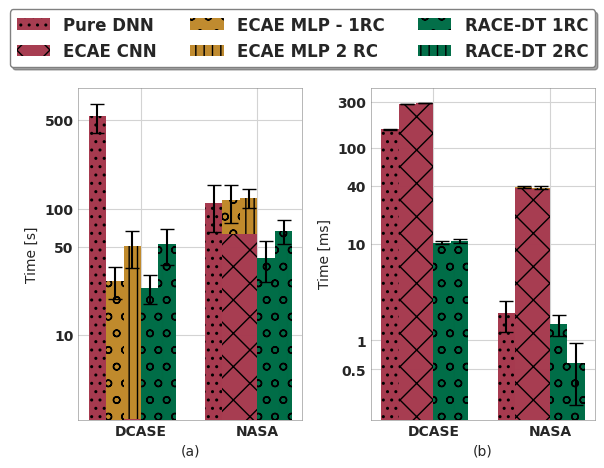

In [44]:
import matplotlib.font_manager as font_manager
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('../../../graphics/matteo.mplstyle')
for font in font_manager.findSystemFonts("./graphics"):
    font_manager.fontManager.addfont(font)
rcParams['font.family'] = 'Palatino'
rcParams['axes.unicode_minus'] = False


colors = ['#5A5B9F', '#D94F70', '#009473', '#F0C05A', '#7BC4C4', '#FF6F61']
dark_colors = ['#3A3B6F', '#A63A4F', '#006D47', '#C08A2C', '#5A9A9A', '#CC4F41', '#3A3B6F', '#A63A4F', '#006D47', '#C08A2C', '#5A9A9A', '#CC4F41']
hatchs = [
    "..",
    "x",
    "o",
    "-",
    "+",
    "O",
    "x",
    ".",
    "o",
    "||",
    "+",
    "O",
]

# for c in dark_colors:
    # # show color
    # plt.figure(figsize=(1, 1))
    # plt.gca().add_patch(plt.Rectangle((0, 0), 1, 1, color=c))

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))
fig.subplots_adjust(hspace=0.5)

datasets = ["DCASE", "NASA"]

# Air Quality Plot
x = np.arange(len(datasets))  # the label locations
width = 0.15  # the width of the bars

d_1_ae = np.array(ecae_1layer_cnn_train_time_mean)
d_1_mlp = np.array(ecae_1layer_mlp_train_time_mean)
d_2_ae = np.array(ecae_2layer_cnn_train_time_mean)
d_2_mlp = np.array(ecae_2layer_mlp_train_time_mean)

dp_1_ae = np.array(ecae_1layer_cnn_pred_time_mean)
dp_1_mlp = np.array(ecae_1layer_mlp_pred_time_mean)
dp_2_ae = np.array(ecae_2layer_cnn_pred_time_mean)
dp_2_mlp = np.array(ecae_2layer_mlp_pred_time_mean)

ax1.bar(x - width * 2.5, red_ai_gpu_train_time_mean, width, label='Pure DNN', color=dark_colors[1], hatch=hatchs[0], alpha=0.99)
ax1.bar(x - width * 1.5, d_1_ae, width, label='ECAE CNN', color=dark_colors[1], hatch=hatchs[1], alpha=0.99)
ax1.bar(x - width * 1.5, d_1_mlp, width, bottom=d_1_ae, label='ECAE MLP - 1RC', color=dark_colors[3], hatch=hatchs[2], alpha=0.99)
ax1.bar(x - width * 0.5, d_2_ae, width, label='ECAE CNN', color=dark_colors[1], hatch=hatchs[1], alpha=0.99)
ax1.bar(x - width * 0.5, d_2_mlp, width, bottom=d_2_ae, label='ECAE MLP 2 RC', color=dark_colors[3], hatch=hatchs[9], alpha=0.99)
ax1.bar(x + width * 0.5, race_1layer_train_time_mean, width, label="RACE-DT 1RC", color=dark_colors[2], hatch=hatchs[8], alpha=0.99)
ax1.bar(x + width * 1.5, race_2layer_train_time_mean, width, label="RACE-DT 2RC", color=dark_colors[2], hatch=hatchs[9], alpha=0.99)

ax2.bar(x - width * 2.5, red_ai_gpu_pred_time_mean, width, label='Pure DNN', color=dark_colors[1], hatch=hatchs[0], alpha=0.99)
ax2.bar(x - width * 1.5, dp_1_ae, width, label='ECAE CNN', color=dark_colors[1], hatch=hatchs[1], alpha=0.99)
ax2.bar(x - width * 1.5, dp_1_mlp, width, bottom=dp_1_ae, label='ECAE MLP - 1RC', color=dark_colors[3], hatch=hatchs[2], alpha=0.99)
ax2.bar(x - width * 0.5, dp_2_ae, width, label='ECAE CNN', color=dark_colors[1], hatch=hatchs[1], alpha=0.99)
ax2.bar(x - width * 0.5, dp_2_mlp, width, bottom=dp_2_ae, label='ECAE MLP 2 RC', color=dark_colors[3], hatch=hatchs[9], alpha=0.99)
ax2.bar(x + width * 0.5, race_1layer_pred_time_mean, width, label="RACE-DT 1RC", color=dark_colors[2], hatch=hatchs[8], alpha=0.99)
ax2.bar(x + width * 1.5, race_2layer_pred_time_mean, width, label="RACE-DT 2RC", color=dark_colors[2], hatch=hatchs[9], alpha=0.99)

# ax bar with error bars
ax1.bar(x - width * 2.5, red_ai_gpu_train_time_mean, width, yerr=red_ai_gpu_train_time_std, capsize=5, color=dark_colors[1], hatch=hatchs[0], alpha=0.99)
ax1.bar(x - width * 1.5, d_1_mlp, width, bottom=d_1_ae, yerr=ecae_1layer_mlp_train_time_std, capsize=5, color=dark_colors[3], hatch=hatchs[2], alpha=0.99)
ax1.bar(x - width * 0.5, d_2_mlp, width, bottom=d_2_ae, yerr=ecae_2layer_mlp_train_time_std, capsize=5, color=dark_colors[3], hatch=hatchs[9], alpha=0.99)
ax1.bar(x + width * 0.5, race_1layer_train_time_mean, width, yerr=race_1layer_train_time_std, capsize=5, color=dark_colors[2], hatch=hatchs[8], alpha=0.99)
ax1.bar(x + width * 1.5, race_2layer_train_time_mean, width, yerr=race_2layer_train_time_std, capsize=5, color=dark_colors[2], hatch=hatchs[8], alpha=0.99)

ax2.bar(x - width * 2.5, red_ai_gpu_pred_time_mean, width, yerr=red_ai_gpu_pred_time_std, capsize=5, color=dark_colors[1], hatch=hatchs[0], alpha=0.99)
ax2.bar(x - width * 1.5, dp_1_mlp, width, bottom=dp_1_ae, yerr=ecae_1layer_mlp_pred_time_std, capsize=5, color=dark_colors[3], hatch=hatchs[2], alpha=0.99)
ax2.bar(x - width * 0.5, dp_2_mlp, width, bottom=dp_2_ae, yerr=ecae_2layer_mlp_pred_time_std, capsize=5, color=dark_colors[3], hatch=hatchs[9], alpha=0.99)
ax2.bar(x + width * 0.5, race_1layer_pred_time_mean, width, yerr=[ x/3 for x in race_1layer_pred_time_std], capsize=5, color=dark_colors[2], hatch=hatchs[8], alpha=0.99)
ax2.bar(x + width * 1.5, race_2layer_pred_time_mean, width, yerr=[ x/3 for x in race_2layer_pred_time_std], capsize=5, color=dark_colors[2], hatch=hatchs[8], alpha=0.99)

ax1.set_xticks(x)
ax1.set_xticklabels(datasets)
ax1.set_xlabel('(a)')
ax1.set_ylabel('Time [s]')
ax1.set_yscale("functionlog", functions=[lambda x: x * 1, lambda x: x / 1])
ax1.set_yticks([10, 50, 100, 500 ])
ax1.set_yticklabels([10, 50, 100, 500 ])


ax2.set_xticks(x)
ax2.set_xticklabels(datasets)
ax2.set_xlabel('(b)')
ax2.set_ylabel('Time [ms]')
ax2.set_yscale("functionlog", functions=[lambda x: x * 1, lambda x: x / 1])
ax2.set_yticks([0.0005, 0.001, 0.01, 0.04, 0.1, 0.3 ])
ax2.set_yticklabels([0.5, 1, 10, 40, 100, 300 ])

# tight layout
plt.tight_layout()
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys(), loc='center', bbox_to_anchor=(1, 1.15), fancybox=True, shadow=True, ncol=3)


# save as pdf
fig.savefig("race_train_pred_time.pdf", bbox_inches='tight', dpi=300)

# show legend
# ax2.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

### CPU / GPU / Memory

In [29]:
# ------------------------------------- cpu usage

cpu_perc_average_nasa_lstm_gpu, cpu_perc_average_nasa_lstm_gpu_std = avg_cpu_lstm_gpu.mean(), avg_cpu_lstm_gpu.std()
cpu_perc_average_nasa_lstm_cpu, cpu_perc_average_nasa_lstm_cpu_std = avg_cpu_lstm_cpu.mean(), avg_cpu_lstm_cpu.std()
cpu_perc_average_nasa_ecae_1layers_mlp, cpu_perc_average_nasa_ecae_1layers_mlp_std = avg_cpu_ecae_1layers_mlp.mean(), avg_cpu_ecae_1layers_mlp.std()
cpu_perc_average_nasa_ecae_2layers_mlp, cpu_perc_average_nasa_ecae_2layers_mlp_std = avg_cpu_ecae_2layers_mlp.mean(), avg_cpu_ecae_2layers_mlp.std()
cpu_perc_average_nasa_ecae_1layers_ae, cpu_perc_average_nasa_ecae_1layers_ae_std = avg_cpu_ecae_1layers_ae.mean(), avg_cpu_ecae_1layers_ae.std()
cpu_perc_average_nasa_ecae_2layers_ae, cpu_perc_average_nasa_ecae_2layers_ae_std = avg_cpu_ecae_2layers_ae.mean(), avg_cpu_ecae_2layers_ae.std()
cpu_perc_average_nasa_race_step2_1layers, cpu_perc_average_nasa_race_step2_1layers_std = avg_cpu_race_step2_1layers.mean(), avg_cpu_race_step2_1layers.std()
cpu_perc_average_nasa_race_step2_2layers, cpu_perc_average_nasa_race_step2_2layers_std = avg_cpu_race_step2_2layers.mean(), avg_cpu_race_step2_2layers.std()

cpu_perc_average_dcase_melspec, cpu_perc_average_dcase_melspec_std = dcase_melspec_cpu_usage.mean(), dcase_melspec_cpu_usage.std()
cpu_perc_average_dcase_mfcc, cpu_perc_average_dcase_mfcc_std = dcase_mfcc_cpu_usage.mean(), dcase_mfcc_cpu_usage.std()
cpu_perc_average_dcase_ecae_layer1_cnn, cpu_perc_average_dcase_ecae_layer1_cnn_std = dcase_ecae_layer1_cpu_usage_cnn.mean(), dcase_ecae_layer1_cpu_usage_cnn.std()
cpu_perc_average_dcase_ecae_layer1_mlp, cpu_perc_average_dcase_ecae_layer1_mlp_std = dcase_ecae_layer1_cpu_usage_mlp.mean(), dcase_ecae_layer1_cpu_usage_mlp.std()
cpu_perc_average_dcase_ecae_layer2_cnn, cpu_perc_average_dcase_ecae_layer2_cnn_std = dcase_ecae_layer2_cpu_usage_cnn.mean(), dcase_ecae_layer2_cpu_usage_cnn.std()
cpu_perc_average_dcase_ecae_layer2_mlp, cpu_perc_average_dcase_ecae_layer2_mlp_std = dcase_ecae_layer2_cpu_usage_mlp.mean(), dcase_ecae_layer2_cpu_usage_mlp.std()
cpu_perc_average_dcase_race_layer1, cpu_perc_average_dcase_race_layer1_std = dcase_race_layer1_cpu_usage.mean(), dcase_race_layer1_cpu_usage.std()
cpu_perc_average_dcase_race_layer2, cpu_perc_average_dcase_race_layer2_std = dcase_race_layer2_cpu_usage.mean(), dcase_race_layer2_cpu_usage.std()

red_ai_cpu_perc_mean = [cpu_perc_average_dcase_mfcc, cpu_perc_average_nasa_lstm_gpu]
red_ai_cpu_perc_std = [cpu_perc_average_dcase_mfcc_std, cpu_perc_average_nasa_lstm_gpu_std]

ecae_1layer_cnn_cpu_perc_mean = [cpu_perc_average_dcase_ecae_layer1_cnn, cpu_perc_average_nasa_ecae_1layers_ae]
ecae_1layer_cnn_cpu_perc_std = [cpu_perc_average_dcase_ecae_layer1_cnn_std, cpu_perc_average_nasa_ecae_1layers_ae_std]
ecae_1layer_mlp_cpu_perc_mean = [cpu_perc_average_dcase_ecae_layer1_mlp, cpu_perc_average_nasa_ecae_2layers_mlp]
ecae_1layer_mlp_cpu_perc_std = [cpu_perc_average_dcase_ecae_layer1_mlp_std, cpu_perc_average_nasa_ecae_1layers_mlp_std]

ecae_2layer_cnn_cpu_perc_mean = [cpu_perc_average_dcase_ecae_layer2_cnn, cpu_perc_average_nasa_ecae_2layers_ae]
ecae_2layer_cnn_cpu_perc_std = [cpu_perc_average_dcase_ecae_layer2_cnn_std, cpu_perc_average_nasa_ecae_2layers_ae_std]
ecae_2layer_mlp_cpu_perc_mean = [cpu_perc_average_dcase_ecae_layer2_mlp, cpu_perc_average_nasa_ecae_1layers_mlp]
ecae_2layer_mlp_cpu_perc_std = [cpu_perc_average_dcase_ecae_layer2_mlp_std, cpu_perc_average_nasa_ecae_2layers_mlp_std]

race_1layer_cpu_perc_mean = [cpu_perc_average_dcase_race_layer1, cpu_perc_average_nasa_race_step2_1layers]
race_1layer_cpu_perc_std = [cpu_perc_average_dcase_race_layer1_std, cpu_perc_average_nasa_race_step2_1layers_std]
race_2layer_cpu_perc_mean = [cpu_perc_average_dcase_race_layer2, cpu_perc_average_nasa_race_step2_2layers]
race_2layer_cpu_perc_std = [cpu_perc_average_dcase_race_layer2_std, cpu_perc_average_nasa_race_step2_2layers_std]

# ------------------------------------- gpu usage

gpu_perc_average_nasa_lstm_gpu, gpu_perc_average_nasa_lstm_gpu_std = avg_gpu_usage_lstm_gpu.mean(), avg_gpu_usage_lstm_gpu.std()
gpu_perc_average_nasa_lstm_cpu, gpu_perc_average_nasa_lstm_cpu_std = avg_gpu_usage_lstm_cpu.mean(), avg_gpu_usage_lstm_cpu.std()
gpu_perc_average_nasa_ecae_1layers_mlp, gpu_perc_average_nasa_ecae_1layers_mlp_std = avg_gpu_usage_ecae_1layers_mlp.mean(), avg_gpu_usage_ecae_1layers_mlp.std()
gpu_perc_average_nasa_ecae_2layers_mlp, gpu_perc_average_nasa_ecae_2layers_mlp_std = avg_gpu_usage_ecae_2layers_mlp.mean(), avg_gpu_usage_ecae_2layers_mlp.std()
gpu_perc_average_nasa_ecae_1layers_ae, gpu_perc_average_nasa_ecae_1layers_ae_std = avg_gpu_usage_ecae_1layers_ae.mean(), avg_gpu_usage_ecae_1layers_ae.std()
gpu_perc_average_nasa_ecae_2layers_ae, gpu_perc_average_nasa_ecae_2layers_ae_std = avg_gpu_usage_ecae_2layers_ae.mean(), avg_gpu_usage_ecae_2layers_ae.std()
gpu_perc_average_nasa_race_step2_1layers, gpu_perc_average_nasa_race_step2_1layers_std = avg_gpu_usage_race_step2_1layers.mean(), avg_gpu_usage_race_step2_1layers.std()
gpu_perc_average_nasa_race_step2_2layers, gpu_perc_average_nasa_race_step2_2layers_std = avg_gpu_usage_race_step2_2layers.mean(), avg_gpu_usage_race_step2_2layers.std()

gpu_perc_average_dcase_melspec, gpu_perc_average_dcase_melspec_std = dcase_melspec_gpu_usage.mean(), dcase_melspec_gpu_usage.std()
gpu_perc_average_dcase_mfcc, gpu_perc_average_dcase_mfcc_std = dcase_mfcc_gpu_usage.mean(), dcase_mfcc_gpu_usage.std()
gpu_perc_average_dcase_ecae_layer1_cnn, gpu_perc_average_dcase_ecae_layer1_cnn_std = dcase_ecae_layer1_gpu_usage_cnn.mean(), dcase_ecae_layer1_gpu_usage_cnn.std()
gpu_perc_average_dcase_ecae_layer1_mlp, gpu_perc_average_dcase_ecae_layer1_mlp_std = dcase_ecae_layer1_gpu_usage_mlp.mean(), dcase_ecae_layer1_gpu_usage_mlp.std()
gpu_perc_average_dcase_ecae_layer2_cnn, gpu_perc_average_dcase_ecae_layer2_cnn_std = dcase_ecae_layer2_gpu_usage_cnn.mean(), dcase_ecae_layer2_gpu_usage_cnn.std()
gpu_perc_average_dcase_ecae_layer2_mlp, gpu_perc_average_dcase_ecae_layer2_mlp_std = dcase_ecae_layer2_gpu_usage_mlp.mean(), dcase_ecae_layer2_gpu_usage_mlp.std()
gpu_perc_average_dcase_race_layer1, gpu_perc_average_dcase_race_layer1_std = dcase_race_layer1_gpu_usage.mean(), dcase_race_layer1_gpu_usage.std()
gpu_perc_average_dcase_race_layer2, gpu_perc_average_dcase_race_layer2_std = dcase_race_layer2_gpu_usage.mean(), dcase_race_layer2_gpu_usage.std()

red_ai_gpu_perc_mean = [gpu_perc_average_dcase_mfcc, gpu_perc_average_nasa_lstm_gpu]
red_ai_gpu_perc_std = [gpu_perc_average_dcase_mfcc_std, gpu_perc_average_nasa_lstm_gpu_std]

ecae_1layer_cnn_gpu_perc_mean = [gpu_perc_average_dcase_ecae_layer1_cnn, gpu_perc_average_nasa_ecae_1layers_ae]
ecae_1layer_cnn_gpu_perc_std = [gpu_perc_average_dcase_ecae_layer1_cnn_std, gpu_perc_average_nasa_ecae_1layers_ae_std]
ecae_1layer_mlp_gpu_perc_mean = [gpu_perc_average_dcase_ecae_layer1_mlp, gpu_perc_average_nasa_ecae_2layers_mlp]
ecae_1layer_mlp_gpu_perc_std = [gpu_perc_average_dcase_ecae_layer1_mlp_std, gpu_perc_average_nasa_ecae_1layers_mlp_std]

ecae_2layer_cnn_gpu_perc_mean = [gpu_perc_average_dcase_ecae_layer2_cnn, gpu_perc_average_nasa_ecae_2layers_ae]
ecae_2layer_cnn_gpu_perc_std = [gpu_perc_average_dcase_ecae_layer2_cnn_std, gpu_perc_average_nasa_ecae_2layers_ae_std]
ecae_2layer_mlp_gpu_perc_mean = [gpu_perc_average_dcase_ecae_layer2_mlp, gpu_perc_average_nasa_ecae_1layers_mlp]
ecae_2layer_mlp_gpu_perc_std = [gpu_perc_average_dcase_ecae_layer2_mlp_std, gpu_perc_average_nasa_ecae_2layers_mlp_std]

race_1layer_gpu_perc_mean = [gpu_perc_average_dcase_race_layer1, gpu_perc_average_nasa_race_step2_1layers]
race_1layer_gpu_perc_std = [gpu_perc_average_dcase_race_layer1_std, gpu_perc_average_nasa_race_step2_1layers_std]
race_2layer_gpu_perc_mean = [gpu_perc_average_dcase_race_layer2, gpu_perc_average_nasa_race_step2_2layers]
race_2layer_gpu_perc_std = [gpu_perc_average_dcase_race_layer2_std, gpu_perc_average_nasa_race_step2_2layers_std]

# ------------------------------------- memory usage

memory_perc_average_nasa_lstm_gpu, memory_perc_average_nasa_lstm_gpu_std = avg_memory_usage_lstm_gpu.mean(), avg_memory_usage_lstm_gpu.std()
memory_perc_average_nasa_lstm_cpu, memory_perc_average_nasa_lstm_cpu_std = avg_memory_usage_lstm_cpu.mean(), avg_memory_usage_lstm_cpu.std()
memory_perc_average_nasa_ecae_1layers_mlp, memory_perc_average_nasa_ecae_1layers_mlp_std = avg_memory_usage_ecae_1layers_mlp.mean(), avg_memory_usage_ecae_1layers_mlp.std()
memory_perc_average_nasa_ecae_2layers_mlp, memory_perc_average_nasa_ecae_2layers_mlp_std = avg_memory_usage_ecae_2layers_mlp.mean(), avg_memory_usage_ecae_2layers_mlp.std()
memory_perc_average_nasa_ecae_1layers_ae, memory_perc_average_nasa_ecae_1layers_ae_std = avg_memory_usage_ecae_1layers_ae.mean(), avg_memory_usage_ecae_1layers_ae.std()
memory_perc_average_nasa_ecae_2layers_ae, memory_perc_average_nasa_ecae_2layers_ae_std = avg_memory_usage_ecae_2layers_ae.mean(), avg_memory_usage_ecae_2layers_ae.std()
memory_perc_average_nasa_race_step2_1layers, memory_perc_average_nasa_race_step2_1layers_std = avg_memory_usage_race_step2_1layers.mean(), avg_memory_usage_race_step2_1layers.std()
memory_perc_average_nasa_race_step2_2layers, memory_perc_average_nasa_race_step2_2layers_std = avg_memory_usage_race_step2_2layers.mean(), avg_memory_usage_race_step2_2layers.std()

memory_perc_average_dcase_melspec, memory_perc_average_dcase_melspec_std = dcase_melspec_memory_usage.mean(), dcase_melspec_memory_usage.std()
memory_perc_average_dcase_mfcc, memory_perc_average_dcase_mfcc_std = dcase_mfcc_memory_usage.mean(), dcase_mfcc_memory_usage.std()
memory_perc_average_dcase_ecae_layer1_cnn, memory_perc_average_dcase_ecae_layer1_cnn_std = dcase_ecae_layer1_memory_usage_cnn.mean(), dcase_ecae_layer1_memory_usage_cnn.std()
memory_perc_average_dcase_ecae_layer1_mlp, memory_perc_average_dcase_ecae_layer1_mlp_std = dcase_ecae_layer1_memory_usage_mlp.mean(), dcase_ecae_layer1_memory_usage_mlp.std()
memory_perc_average_dcase_ecae_layer2_cnn, memory_perc_average_dcase_ecae_layer2_cnn_std = dcase_ecae_layer2_memory_usage_cnn.mean(), dcase_ecae_layer2_memory_usage_cnn.std()
memory_perc_average_dcase_ecae_layer2_mlp, memory_perc_average_dcase_ecae_layer2_mlp_std = dcase_ecae_layer2_memory_usage_mlp.mean(), dcase_ecae_layer2_memory_usage_mlp.std()
memory_perc_average_dcase_race_layer1, memory_perc_average_dcase_race_layer1_std = dcase_race_layer1_memory_usage.mean(), dcase_race_layer1_memory_usage.std()
memory_perc_average_dcase_race_layer2, memory_perc_average_dcase_race_layer2_std = dcase_race_layer2_memory_usage.mean(), dcase_race_layer2_memory_usage.std()

red_ai_memory_perc_mean = [memory_perc_average_dcase_mfcc, memory_perc_average_nasa_lstm_gpu]
red_ai_memory_perc_std = [memory_perc_average_dcase_mfcc_std, memory_perc_average_nasa_lstm_gpu_std]

ecae_1layer_cnn_memory_perc_mean = [memory_perc_average_dcase_ecae_layer1_cnn, memory_perc_average_nasa_ecae_1layers_ae]
ecae_1layer_cnn_memory_perc_std = [memory_perc_average_dcase_ecae_layer1_cnn_std, memory_perc_average_nasa_ecae_1layers_ae_std]
ecae_1layer_mlp_memory_perc_mean = [memory_perc_average_dcase_ecae_layer1_mlp, memory_perc_average_nasa_ecae_2layers_mlp]
ecae_1layer_mlp_memory_perc_std = [memory_perc_average_dcase_ecae_layer1_mlp_std, memory_perc_average_nasa_ecae_1layers_mlp_std]

ecae_2layer_cnn_memory_perc_mean = [memory_perc_average_dcase_ecae_layer2_cnn, memory_perc_average_nasa_ecae_2layers_ae]
ecae_2layer_cnn_memory_perc_std = [memory_perc_average_dcase_ecae_layer2_cnn_std, memory_perc_average_nasa_ecae_2layers_ae_std]
ecae_2layer_mlp_memory_perc_mean = [memory_perc_average_dcase_ecae_layer2_mlp, memory_perc_average_nasa_ecae_1layers_mlp]
ecae_2layer_mlp_memory_perc_std = [memory_perc_average_dcase_ecae_layer2_mlp_std, memory_perc_average_nasa_ecae_2layers_mlp_std]

race_1layer_memory_perc_mean = [memory_perc_average_dcase_race_layer1, memory_perc_average_nasa_race_step2_1layers]
race_1layer_memory_perc_std = [memory_perc_average_dcase_race_layer1_std, memory_perc_average_nasa_race_step2_1layers_std]
race_2layer_memory_perc_mean = [memory_perc_average_dcase_race_layer2, memory_perc_average_nasa_race_step2_2layers]
race_2layer_memory_perc_std = [memory_perc_average_dcase_race_layer2_std, memory_perc_average_nasa_race_step2_2layers_std]

In [30]:
race_2layer_gpu_perc_mean

[0.0, 0.0]

findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino'

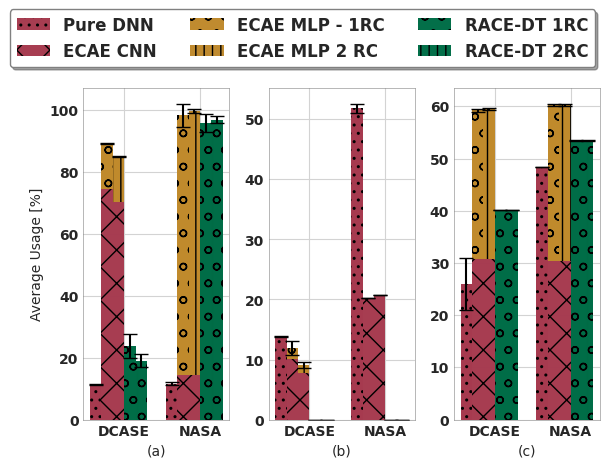

In [48]:
import matplotlib.font_manager as font_manager
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('../../../graphics/matteo.mplstyle')
for font in font_manager.findSystemFonts("./graphics"):
    font_manager.fontManager.addfont(font)
rcParams['font.family'] = 'Palatino'
rcParams['axes.unicode_minus'] = False


colors = ['#5A5B9F', '#D94F70', '#009473', '#F0C05A', '#7BC4C4', '#FF6F61']
dark_colors = ['#3A3B6F', '#A63A4F', '#006D47', '#C08A2C', '#5A9A9A', '#CC4F41', '#3A3B6F', '#A63A4F', '#006D47', '#C08A2C', '#5A9A9A', '#CC4F41']
hatchs = [
    "..",
    "x",
    "o",
    "-",
    "+",
    "O",
    "x",
    ".",
    "o",
    "||",
    "+",
    "O",
]

# for c in dark_colors:
    # # show color
    # plt.figure(figsize=(1, 1))
    # plt.gca().add_patch(plt.Rectangle((0, 0), 1, 1, color=c))

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 4))
fig.subplots_adjust(hspace=0.5)

datasets = ["DCASE", "NASA"]

# Air Quality Plot
x = np.arange(len(datasets))  # the label locations
width = 0.15  # the width of the bars

# cap cpu usage at 100%
for index, el in enumerate(ecae_1layer_cnn_cpu_perc_mean):
    if ecae_1layer_cnn_cpu_perc_mean[index] + ecae_1layer_mlp_cpu_perc_mean[index] + ecae_1layer_mlp_cpu_perc_std[index] > 100:
        ecae_1layer_mlp_cpu_perc_mean[index] = 100 - ecae_1layer_cnn_cpu_perc_mean[index] - ecae_1layer_mlp_cpu_perc_std[index] / 2 

    if ecae_2layer_cnn_cpu_perc_mean[index] + ecae_2layer_mlp_cpu_perc_mean[index] + ecae_2layer_mlp_cpu_perc_std[index] > 100:
        ecae_2layer_mlp_cpu_perc_mean[index] = 100 - ecae_2layer_cnn_cpu_perc_mean[index] - ecae_2layer_mlp_cpu_perc_std[index] / 2

d_1_ae = np.array(ecae_1layer_cnn_cpu_perc_mean)
d_1_mlp = np.array(ecae_1layer_mlp_cpu_perc_mean)
d_2_ae = np.array(ecae_2layer_cnn_cpu_perc_mean)
d_2_mlp = np.array(ecae_2layer_mlp_cpu_perc_mean)

dp_1_ae = np.array(ecae_1layer_cnn_gpu_perc_mean)
dp_1_mlp = np.array(ecae_1layer_mlp_gpu_perc_mean)
dp_2_ae = np.array(ecae_2layer_cnn_gpu_perc_mean)
dp_2_mlp = np.array(ecae_2layer_mlp_gpu_perc_mean)

dpp_1_ae = np.array(ecae_1layer_cnn_memory_perc_mean)
dpp_1_mlp = np.array(ecae_1layer_mlp_memory_perc_mean)
dpp_2_ae = np.array(ecae_2layer_cnn_memory_perc_mean)
dpp_2_mlp = np.array(ecae_2layer_mlp_memory_perc_mean)

ax1.bar(x - width * 2.5, red_ai_cpu_perc_mean, width, label='Pure DNN', color=dark_colors[1], hatch=hatchs[0], alpha=0.99)
ax1.bar(x - width * 1.5, d_1_ae, width, label='ECAE CNN', color=dark_colors[1], hatch=hatchs[1], alpha=0.99)
ax1.bar(x - width * 1.5, d_1_mlp, width, bottom=d_1_ae, label='ECAE MLP - 1RC', color=dark_colors[3], hatch=hatchs[2], alpha=0.99)
ax1.bar(x - width * 0.5, d_2_ae, width, label='ECAE CNN', color=dark_colors[1], hatch=hatchs[1], alpha=0.99)
ax1.bar(x - width * 0.5, d_2_mlp, width, bottom=d_2_ae, label='ECAE MLP 2 RC', color=dark_colors[3], hatch=hatchs[9], alpha=0.99)
ax1.bar(x + width * 0.5, race_1layer_cpu_perc_mean, width, label="RACE-DT 1RC", color=dark_colors[2], hatch=hatchs[8], alpha=0.99)
ax1.bar(x + width * 1.5, race_2layer_cpu_perc_mean, width, label="RACE-DT 2RC", color=dark_colors[2], hatch=hatchs[9], alpha=0.99)

ax2.bar(x - width * 2.5, red_ai_gpu_perc_mean, width, label='Pure DNN', color=dark_colors[1], hatch=hatchs[0], alpha=0.99)
ax2.bar(x - width * 1.5, dp_1_ae, width, label='ECAE CNN', color=dark_colors[1], hatch=hatchs[1], alpha=0.99)
ax2.bar(x - width * 1.5, dp_1_mlp, width, bottom=dp_1_ae, label='ECAE MLP - 1RC', color=dark_colors[3], hatch=hatchs[2], alpha=0.99)
ax2.bar(x - width * 0.5, dp_2_ae, width, label='ECAE CNN', color=dark_colors[1], hatch=hatchs[1], alpha=0.99)
ax2.bar(x - width * 0.5, dp_2_mlp, width, bottom=dp_2_ae, label='ECAE MLP 2 RC', color=dark_colors[3], hatch=hatchs[9], alpha=0.99)
ax2.bar(x + width * 0.5, race_1layer_gpu_perc_mean, width, label="RACE-DT 1RC", color=dark_colors[2], hatch=hatchs[8], alpha=0.99)
ax2.bar(x + width * 1.5, race_1layer_gpu_perc_mean, width, label="RACE-DT 2RC", color=dark_colors[2], hatch=hatchs[9], alpha=0.99)

ax3.bar(x - width * 2.5, red_ai_memory_perc_mean, width, label='Pure DNN', color=dark_colors[1], hatch=hatchs[0], alpha=0.99)
ax3.bar(x - width * 1.5, dpp_1_ae, width, label='ECAE CNN', color=dark_colors[1], hatch=hatchs[1], alpha=0.99)
ax3.bar(x - width * 1.5, dpp_1_mlp, width, bottom=dpp_1_ae, label='ECAE MLP - 1RC', color=dark_colors[3], hatch=hatchs[2], alpha=0.99)
ax3.bar(x - width * 0.5, dpp_2_ae, width, label='ECAE CNN', color=dark_colors[1], hatch=hatchs[1], alpha=0.99)
ax3.bar(x - width * 0.5, dpp_2_mlp, width, bottom=dpp_2_ae, label='ECAE MLP 2 RC', color=dark_colors[3], hatch=hatchs[9], alpha=0.99)
ax3.bar(x + width * 0.5, race_1layer_memory_perc_mean, width, label="RACE-DT 1RC", color=dark_colors[2], hatch=hatchs[8], alpha=0.99)
ax3.bar(x + width * 1.5, race_2layer_memory_perc_mean, width, label="RACE-DT 2RC", color=dark_colors[2], hatch=hatchs[9], alpha=0.99)

# ax bar with error bars
ax1.bar(x - width * 2.5, red_ai_cpu_perc_mean, width, yerr=red_ai_cpu_perc_std, capsize=5, color=dark_colors[1], hatch=hatchs[0], alpha=0.99)
ax1.bar(x - width * 1.5, d_1_mlp, width, bottom=d_1_ae, yerr=ecae_1layer_mlp_cpu_perc_std, capsize=5, color=dark_colors[3], hatch=hatchs[2], alpha=0.99)
ax1.bar(x - width * 0.5, d_2_mlp, width, bottom=d_2_ae, yerr=ecae_2layer_mlp_cpu_perc_std, capsize=5, color=dark_colors[3], hatch=hatchs[9], alpha=0.99)
ax1.bar(x + width * 0.5, race_1layer_cpu_perc_mean, width, yerr=race_1layer_cpu_perc_std, capsize=5, color=dark_colors[2], hatch=hatchs[8], alpha=0.99)
ax1.bar(x + width * 1.5, race_2layer_cpu_perc_mean, width, yerr=race_2layer_cpu_perc_std, capsize=5, color=dark_colors[2], hatch=hatchs[8], alpha=0.99)

ax2.bar(x - width * 2.5, red_ai_gpu_perc_mean, width, yerr=red_ai_gpu_perc_std, capsize=5, color=dark_colors[1], hatch=hatchs[0], alpha=0.99)
ax2.bar(x - width * 1.5, dp_1_mlp, width, bottom=dp_1_ae, yerr=ecae_1layer_mlp_gpu_perc_std, capsize=5, color=dark_colors[3], hatch=hatchs[2], alpha=0.99)
ax2.bar(x - width * 0.5, dp_2_mlp, width, bottom=dp_2_ae, yerr=ecae_2layer_mlp_gpu_perc_std, capsize=5, color=dark_colors[3], hatch=hatchs[9], alpha=0.99)
ax2.bar(x + width * 0.5, race_1layer_gpu_perc_mean, width, yerr=[ x/3 for x in race_1layer_gpu_perc_std], capsize=5, color=dark_colors[2], hatch=hatchs[8], alpha=0.99)
ax2.bar(x + width * 1.5, race_2layer_gpu_perc_mean, width, yerr=[ x/3 for x in race_2layer_gpu_perc_std], capsize=5, color=dark_colors[2], hatch=hatchs[8], alpha=0.99)

ax3.bar(x - width * 2.5, red_ai_memory_perc_mean, width, yerr=red_ai_memory_perc_std, capsize=5, color=dark_colors[1], hatch=hatchs[0], alpha=0.99)
ax3.bar(x - width * 1.5, dpp_1_mlp, width, bottom=dpp_1_ae, yerr=ecae_1layer_mlp_memory_perc_std, capsize=5, color=dark_colors[3], hatch=hatchs[2], alpha=0.99)
ax3.bar(x - width * 0.5, dpp_2_mlp, width, bottom=dpp_2_ae, yerr=ecae_2layer_mlp_memory_perc_std, capsize=5, color=dark_colors[3], hatch=hatchs[9], alpha=0.99)
ax3.bar(x + width * 0.5, race_1layer_memory_perc_mean, width, yerr=[ x/3 for x in race_1layer_memory_perc_std], capsize=5, color=dark_colors[2], hatch=hatchs[8], alpha=0.99)
ax3.bar(x + width * 1.5, race_2layer_memory_perc_mean, width, yerr=[ x/3 for x in race_2layer_memory_perc_std], capsize=5, color=dark_colors[2], hatch=hatchs[8], alpha=0.99)


ax1.set_xticks(x)
ax1.set_xticklabels(datasets)
ax1.set_xlabel('(a)')
ax1.set_ylabel('Average Usage [%]')
# ax1.set_yscale("functionlog", functions=[lambda x: x * 1, lambda x: x / 1])
# ax1.set_yticks([10, 50, 100, 500 ])
# ax1.set_yticklabels([10, 50, 100, 500 ])


ax2.set_xticks(x)
ax2.set_xticklabels(datasets)
ax2.set_xlabel('(b)')
# ax2.set_ylabel('Average Prediction Time [ms]')
# ax2.set_yscale("functionlog", functions=[lambda x: x * 1, lambda x: x / 1])
# ax2.set_yticks([0.0005, 0.001, 0.01, 0.04, 0.1, 0.3 ])
# ax2.set_yticklabels([0.5, 1, 10, 40, 100, 300 ])

ax3.set_xticks(x)
ax3.set_xticklabels(datasets)
ax3.set_xlabel('(c)')

# tight layout
plt.tight_layout()
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys(), loc='center', bbox_to_anchor=(1.5, 1.15), fancybox=True, shadow=True, ncol=3)


# save as pdf
fig.savefig("race_resource_perc.pdf", bbox_inches='tight', dpi=300)

# show legend
# ax2.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

### Energy

In [32]:
# ------------------------------------- energy usage

energy_average_nasa_lstm_gpu, energy_average_nasa_lstm_gpu_std = avg_energy_lstm_gpu.mean(), avg_energy_lstm_gpu.std()
energy_average_nasa_lstm_cpu, energy_average_nasa_lstm_cpu_std = avg_energy_lstm_cpu.mean(), avg_energy_lstm_cpu.std()
energy_average_nasa_ecae_1layers_mlp, energy_average_nasa_ecae_1layers_mlp_std = avg_energy_ecae_1layers_mlp.mean(), avg_energy_ecae_1layers_mlp.std()
energy_average_nasa_ecae_2layers_mlp, energy_average_nasa_ecae_2layers_mlp_std = avg_energy_ecae_2layers_mlp.mean(), avg_energy_ecae_2layers_mlp.std()
energy_average_nasa_ecae_1layers_cnn, energy_average_nasa_ecae_1layers_cnn_std = avg_energy_ecae_1layers_cnn.mean(), avg_energy_ecae_1layers_cnn.std()
energy_average_nasa_ecae_2layers_cnn, energy_average_nasa_ecae_2layers_cnn_std = avg_energy_ecae_2layers_cnn.mean(), avg_energy_ecae_2layers_cnn.std()
energy_average_nasa_race_step2_1layers, energy_average_nasa_race_step2_1layers_std = avg_energy_race_step2_1layers.mean(), avg_energy_race_step2_1layers.std()
energy_average_nasa_race_step2_2layers, energy_average_nasa_race_step2_2layers_std = avg_energy_race_step2_2layers.mean(), avg_energy_race_step2_2layers.std()

energy_average_dcase_melspec, energy_average_dcase_melspec_std = dcase_melspec_energy.mean(), dcase_melspec_energy.std()
energy_average_dcase_mfcc, energy_average_dcase_mfcc_std = dcase_mfcc_energy.mean(), dcase_mfcc_energy.std()
energy_average_dcase_ecae_layer1_cnn, energy_average_dcase_ecae_layer1_cnn_std = dcase_ecae_layer1_energy_cnn.mean(), dcase_ecae_layer1_energy_cnn.std()
energy_average_dcase_ecae_layer1_mlp, energy_average_dcase_ecae_layer1_mlp_std = dcase_ecae_layer1_energy_mlp.mean(), dcase_ecae_layer1_energy_mlp.std()
energy_average_dcase_ecae_layer2_cnn, energy_average_dcase_ecae_layer2_cnn_std = dcase_ecae_layer2_energy_cnn.mean(), dcase_ecae_layer2_energy_cnn.std()
energy_average_dcase_ecae_layer2_mlp, energy_average_dcase_ecae_layer2_mlp_std = dcase_ecae_layer2_energy_mlp.mean(), dcase_ecae_layer2_energy_mlp.std()
energy_average_dcase_race_layer1, energy_average_dcase_race_layer1_std = dcase_race_layer1_energy.mean(), dcase_race_layer1_energy.std()
energy_average_dcase_race_layer2, energy_average_dcase_race_layer2_std = dcase_race_layer2_energy.mean(), dcase_race_layer2_energy.std()

red_ai_energy_mean = [energy_average_dcase_mfcc, energy_average_nasa_lstm_gpu]
red_ai_energy_std = [energy_average_dcase_mfcc_std, energy_average_nasa_lstm_gpu_std]

ecae_1layer_cnn_energy_mean = [energy_average_dcase_ecae_layer1_cnn, energy_average_nasa_ecae_1layers_cnn]
ecae_1layer_cnn_energy_std = [energy_average_dcase_ecae_layer1_cnn_std, energy_average_nasa_ecae_1layers_cnn_std]
ecae_1layer_mlp_energy_mean = [energy_average_dcase_ecae_layer1_mlp, energy_average_nasa_ecae_2layers_mlp]
ecae_1layer_mlp_energy_std = [energy_average_dcase_ecae_layer1_mlp_std, energy_average_nasa_ecae_1layers_mlp_std]

ecae_2layer_cnn_energy_mean = [energy_average_dcase_ecae_layer2_cnn, energy_average_nasa_ecae_2layers_cnn]
ecae_2layer_cnn_energy_std = [energy_average_dcase_ecae_layer2_cnn_std, energy_average_nasa_ecae_2layers_cnn_std]
ecae_2layer_mlp_energy_mean = [energy_average_dcase_ecae_layer2_mlp, energy_average_nasa_ecae_1layers_mlp]
ecae_2layer_mlp_energy_std = [energy_average_dcase_ecae_layer2_mlp_std, energy_average_nasa_ecae_2layers_mlp_std]

race_1layer_energy_mean = [energy_average_dcase_race_layer1, energy_average_nasa_race_step2_1layers]
race_1layer_energy_std = [energy_average_dcase_race_layer1_std, energy_average_nasa_race_step2_1layers_std]
race_2layer_energy_mean = [energy_average_dcase_race_layer2, energy_average_nasa_race_step2_2layers]
race_2layer_energy_std = [energy_average_dcase_race_layer2_std, energy_average_nasa_race_step2_2layers_std]


findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino' not found.
findfont: Font family 'Palatino'

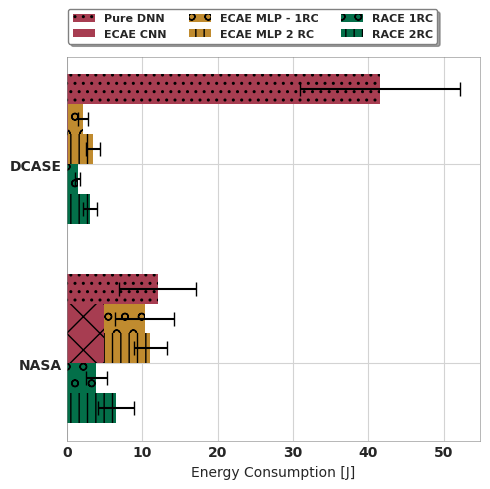

In [37]:
import matplotlib.pyplot as plt
import numpy as np

colors = ['#5A5B9F', '#D94F70', '#009473', '#F0C05A', '#7BC4C4', '#FF6F61']
dark_colors = ['#3A3B6F', '#A63A4F', '#006D47', '#C08A2C', '#5A9A9A', '#CC4F41', '#3A3B6F', '#A63A4F', '#006D47', '#C08A2C', '#5A9A9A', '#CC4F41']
hatchs = [
    "..",
    "x",
    "o",
    "-",
    "+",
    "O",
    "x",
    ".",
    "o",
    "||",
    "+",
    "O",
]


datasets = ["DCASE", "NASA"]
y_pos = np.arange(len(datasets))

# Plot
bar_width = 0.15
fig, ax = plt.subplots(figsize=(5, 5))

# Clustered bars
ax.barh(y_pos - bar_width * 2.5, red_ai_energy_mean, bar_width, label='Pure DNN', color=dark_colors[1], hatch=hatchs[0], alpha=0.99, xerr=red_ai_energy_std, capsize=5)
ax.barh(y_pos - bar_width * 1.5, ecae_1layer_cnn_energy_mean, bar_width, label='ECAE CNN', color=dark_colors[1], hatch=hatchs[1], alpha=0.99, capsize=5)
ax.barh(y_pos - bar_width * 1.5, ecae_1layer_mlp_energy_mean, bar_width, left=ecae_1layer_cnn_energy_mean, label='ECAE MLP - 1RC', color=dark_colors[3], hatch=hatchs[2], alpha=0.99, xerr=ecae_1layer_mlp_energy_std, capsize=5)
ax.barh(y_pos - bar_width * 0.5, ecae_1layer_cnn_energy_mean, bar_width, color=dark_colors[1], hatch=hatchs[1], alpha=0.99, capsize=5)
ax.barh(y_pos - bar_width * 0.5, ecae_2layer_mlp_energy_mean, bar_width, left=ecae_1layer_cnn_energy_mean, label='ECAE MLP 2 RC', color=dark_colors[3], hatch=hatchs[9], alpha=0.99, xerr=ecae_2layer_mlp_energy_std, capsize=5)
ax.barh(y_pos + bar_width * 0.5, race_1layer_energy_mean, bar_width, label="RACE 1RC", color=dark_colors[2], hatch=hatchs[8], alpha=0.99, xerr=race_1layer_energy_std, capsize=5)
ax.barh(y_pos + bar_width * 1.5, race_2layer_energy_mean, bar_width, label="RACE 2RC", color=dark_colors[2], hatch=hatchs[9], alpha=0.99, xerr=race_2layer_energy_std, capsize=5)
ax.set_xlabel('Energy Consumption [J]')
# ax.set_title('Power Consumption by Search Strategy and Dataset')
ax.set_yticks(y_pos)
ax.set_yticklabels(datasets)
ax.invert_yaxis()
ax.legend(loc='center', bbox_to_anchor=(0.45, 1.08), fancybox=True, shadow=True, ncol=3, fontsize=8)

# set log scale 
# ax.set_xscale("functionlog", functions=[lambda x: x * 1, lambda x: x / 1])

# Show plot
plt.tight_layout()
# plt.show()

plt.savefig("race_power_consumption.pdf", bbox_inches='tight')


In [34]:
ecae_1layer_cnn_energy_mean

[0.11368202095590929, 4.965405786824321]

In [35]:
ecae_2layer_cnn_energy_mean

[0.12829027426915054, 4.939318957804287]